In [34]:
import torch 
from torch.utils.mobile_optimizer import optimize_for_mobile
import time
import sys
import numpy as np 
import matplotlib.pyplot as plt
from PIL import Image, ImageFile

from torch.utils.data import Dataset, DataLoader

In [13]:
INFERENCE_PATH = './trained_pytorch_model/resnet_finetuned_smaller_dataset.pth'
INFERENCE_PATH_FOR_MOBILE = './trained_pytorch_model/mobile_version_resnet_finetuned_smaller_dataset.ptl'

In [5]:
## load the model
inference_model = torch.load(INFERENCE_PATH)
inference_model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [7]:
model = torch.quantization.convert(inference_model)

In [8]:
scirpted_model = torch.jit.script(model)

In [12]:
opt_model = optimize_for_mobile(scirpted_model)

In [16]:
opt_model._save_for_lite_interpreter(INFERENCE_PATH_FOR_MOBILE)

## Sample Inference 

In [27]:
sys.path.append('data_ingestion')
from data_ingestion import data_ingestion_for_big_dataset, data_pipeline_pytorch_smaller_dataset

done


In [22]:
# check if CUDA is available
use_cuda = torch.cuda.is_available()
# set device to be cuda if available, otherwise it will be set to cpu
device = torch.device("cuda" if use_cuda else "cpu")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


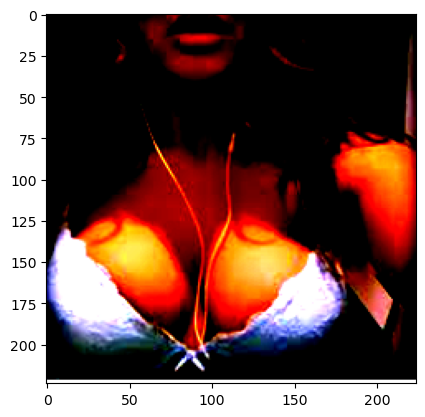

Contains Nudity


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


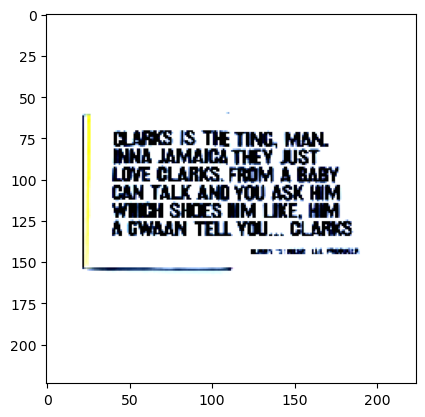

Image is safe


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


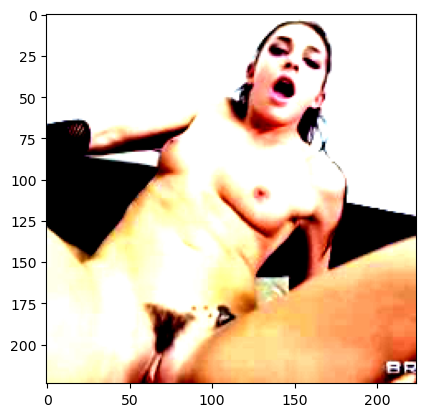

Contains Nudity


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


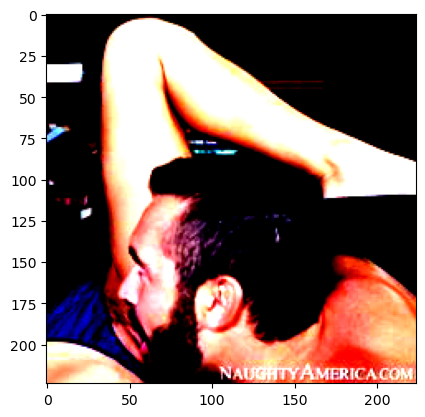

Contains Nudity


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


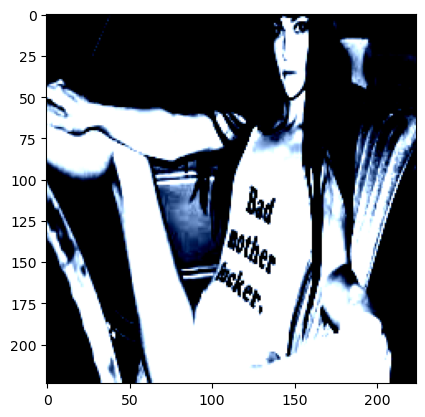

Contains Nudity


In [37]:
model_ft = opt_model
test_loader = data_pipeline_pytorch_smaller_dataset.test_dataloader
model_ft.eval()
with torch.no_grad():
    count = 0
    for inputs, labels in test_loader:
        if count >= 5: break
        count += 1
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        images = np.transpose(inputs[0], (1, 2, 0))
        plt.imshow(images)
        plt.show()
        if preds[0] == torch.tensor(1):
            print("Contains Nudity")
        else:
            print("Image is safe")